# Image Classification with larger CNN

The goal of this exercise is to program a slightly larger CNN that incorporates some of the ideas that have been presented in the class. We use CIFAR-100, which is a bit more challenging than the MNIST data set, but not so much. It contains 50000 images that are labelled into 100 fine-grained classes of 20 more coarse grained classes. In order to make the task a mit more complicated we will use the fine grained classes.

The dataset is build into keras.

In [2]:
import keras
import keras.datasets
import keras.datasets.cifar100
import keras.utils
import keras.optimizers
import numpy as np

import matplotlib.pyplot as plt

print(keras.__version__)

2.11.0


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

169001437/169001437 [==============================] - 11s 0us/step


/var/folders/7l/x2mh194s2_306h2021f8m6940000gn/T/ipykernel_63305/3472643319.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(int(y_train[index]))


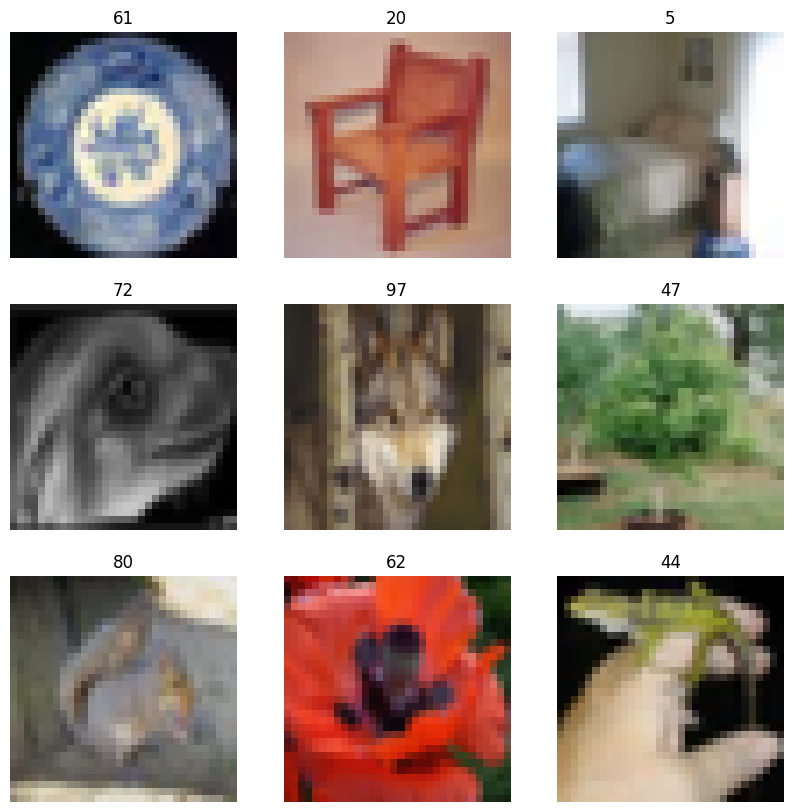

In [4]:
plt.figure(figsize=(10, 10))
for i in range(9):
    index = np.random.randint(50000)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(np.array(x_train[index]).astype("uint8"))
    plt.title(int(y_train[index]))
    plt.axis("off")

In [5]:
num_classes = 100
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
def build_model():
    inp = keras.Input(shape=(32, 32, 3))
    x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(inp)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu")(x)
    #x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(100, activation='softmax')(x)
                        
    return keras.Model(inp, x)

In [7]:
model = build_model()

2025-11-04 15:20:47.887300: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856 

In [10]:
batch_size = 128
epochs = 5
opt = keras.optimizers.RMSprop(learning_rate=0.01)
model = build_model()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
352/352 [==============================] - 28s 78ms/step - loss: 4.6607 - accuracy: 0.0449 - val_loss: 4.1050 - val_accuracy: 0.0816
Epoch 2/5
352/352 [==============================] - 28s 81ms/step - loss: 3.8642 - accuracy: 0.1201 - val_loss: 3.7994 - val_accuracy: 0.1408
Epoch 3/5
352/352 [==============================] - 26s 73ms/step - loss: 3.6409 - accuracy: 0.1598 - val_loss: 3.8580 - val_accuracy: 0.1124
Epoch 4/5
352/352 [==============================] - 28s 79ms/step - loss: 3.5442 - accuracy: 0.1760 - val_loss: 3.6837 - val_accuracy: 0.1644
Epoch 5/5
352/352 [==============================] - 29s 81ms/step - loss: 3.4570 - accuracy: 0.1916 - val_loss: 3.8494 - val_accuracy: 0.1448


The performance is not bad, but also not so great. The best results without using additional data for convolutional neural networks is at about 70 percent.

In [11]:
print(history.history)

{'loss': [4.660656452178955, 3.8642160892486572, 3.6409363746643066, 3.5442464351654053, 3.4569544792175293], 'accuracy': [0.04488888755440712, 0.12008889019489288, 0.1598222255706787, 0.17599999904632568, 0.19155555963516235], 'val_loss': [4.104972839355469, 3.7994320392608643, 3.8580069541931152, 3.683669090270996, 3.8493824005126953], 'val_accuracy': [0.08160000294446945, 0.14079999923706055, 0.11240000277757645, 0.16439999639987946, 0.14480000734329224]}


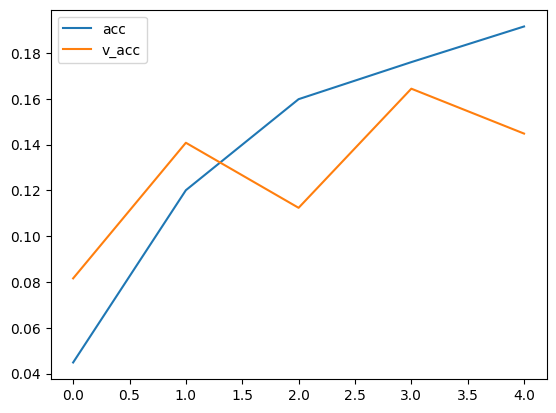

In [12]:
fig, ax = plt.subplots()
ax.plot(history.history['accuracy'], label='acc')
ax.plot( history.history['val_accuracy'], label='v_acc')
plt.legend()
plt.show()

## Exercise 1: Modern CNN

A *modern* CNN should have some of the features discussed in the lecture. Build a model that includes some or all of these:
- ResNet architecture with skip connections
- Batch Normalization
- L2 Regularisation
- Dropout

How does you model perform?

## Exercise 2: Monitoring

Monitoring the training is essential for long running training sessions. Include tensorboard or wandb in your training setup.

## Exercise 3: Data Augmentation (continued next lesson)

What else could be done to get better results? The dataset is quite small, so either another dataset could be used for pretraining, or data augmentation could be added....